In [6]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist["data"], mnist["target"]

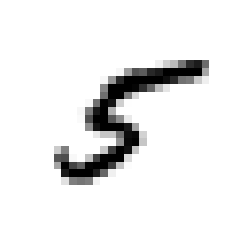

In [104]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

digit = X[2363]
image = digit.reshape(28,28)
plt.imshow(image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [17]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [20]:
import numpy as np

shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [72]:
#5 detector
y_train = y_train.astype(np.int8)
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)


In [73]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)
sgd_clf.predict([digit])

array([False])

In [66]:
sgd_clf.predict([X_test[234]])

array(['7'], dtype='<U1')

In [105]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train_5):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = (y_train_5[train_index])
    X_test_fold = X_train[test_index]
    y_test_fold = (y_train_5[test_index])
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred)) # prints 0.9502, 0.96565 and 0.96495

0.95675
0.9692
0.96635


In [111]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95675, 0.9692 , 0.96635])

In [113]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

never5clf = Never5Classifier()
cross_val_score(never5clf,X_train,y_train_5,cv=3,scoring='accuracy')

array([0.9096 , 0.90785, 0.9115 ])

In [115]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf,X_train,y_train_5,cv=3)

In [116]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_train_5,y_train_pred)

array([[53463,  1116],
       [ 1038,  4383]], dtype=int64)

In [121]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_train_5,y_train_pred))
print(recall_score(y_train_5,y_train_pred))
print(f1_score(y_train_5, y_train_pred))

0.7970540098199672
0.8085224128389596
0.8027472527472528


In [122]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,
method="decision_function")

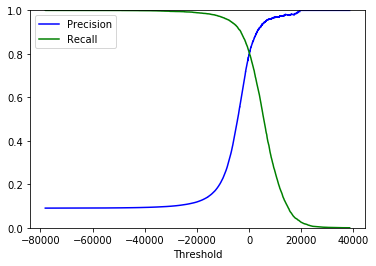

In [124]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b-", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()